1.-En base a la siguientefigura

Identifica de cada uno de los elementos(elementos específicos)su área, perímetro y centroide,a cada uno de los objetos debe ser inscrito dentroun recuadro, una elipse,un círculoy marcar una líneadivisora en el medio tomando de referencia el centroide (cada uno de estos conceptos en un subplot distinto)tomar en cuenta que el color delas figuras mencionadasdebe ser el mismo quetiene el objeto seleccionado.

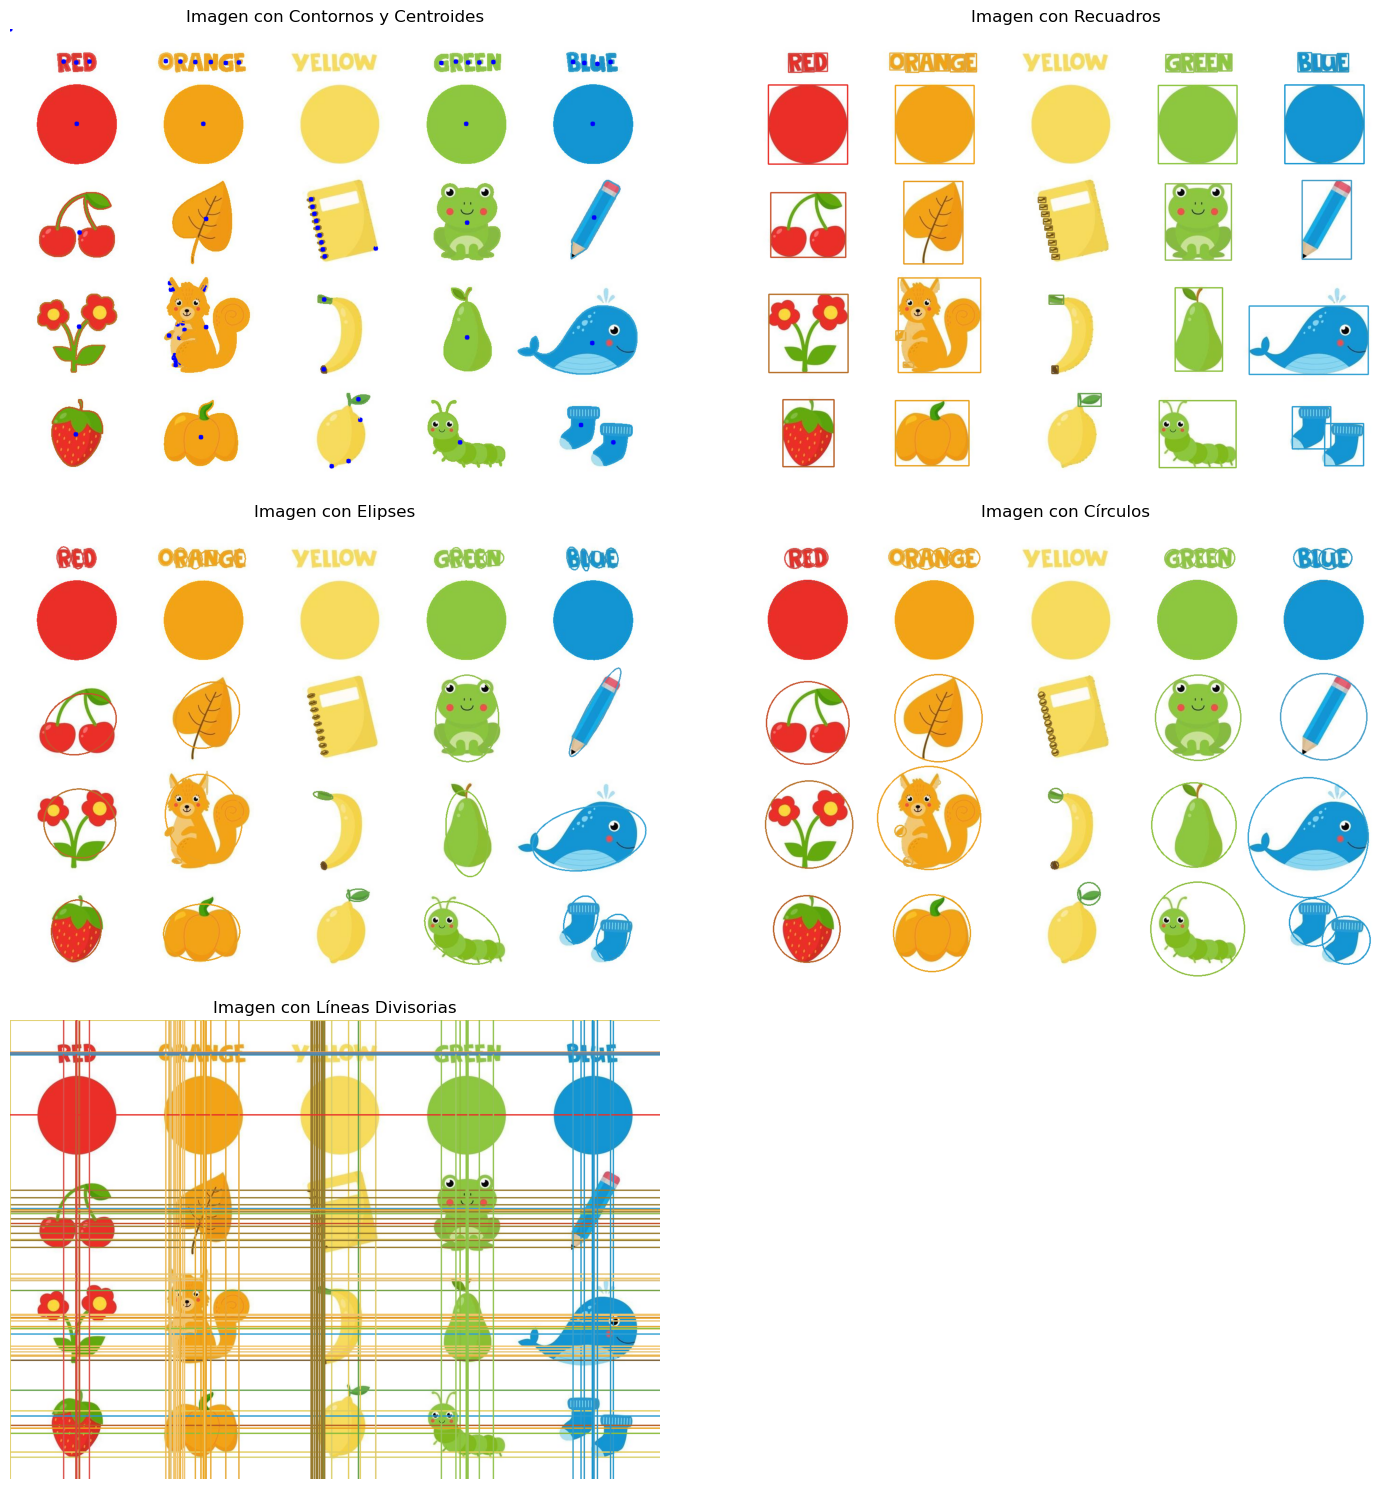

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_average_color(image, contour):
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    mean = cv2.mean(image, mask=mask)[:3]
    return tuple(map(int, mean))

img = cv2.imread('colores.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, umbral = cv2.threshold(gris, 200, 255, cv2.THRESH_BINARY_INV)

contornos, jerarquia = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_contornos = img_rgb.copy()
img_recuadros = img_rgb.copy()
img_elipses = img_rgb.copy()
img_circulos = img_rgb.copy()
img_lineas = img_rgb.copy()

for i, contar in enumerate(contornos):
    momento = cv2.moments(contar)
    if momento["m00"] != 0:
        cX = int(momento["m10"] / momento["m00"]) 
        cY = int(momento["m01"] / momento["m00"])  
    else:
        cX, cY = 0, 0

    area = cv2.contourArea(contar)
    perimetro = cv2.arcLength(contar, True)

    color_promedio = get_average_color(img_rgb, contar)

    x, y, w, h = cv2.boundingRect(contar)
    cv2.rectangle(img_recuadros, (x, y), (x + w, y + h), color_promedio, 2)

    if len(contar) >= 5:
        elipse = cv2.fitEllipse(contar)
        cv2.ellipse(img_elipses, elipse, color_promedio, 2)

    (x_circulo, y_circulo), radio = cv2.minEnclosingCircle(contar)
    centro = (int(x_circulo), int(y_circulo))
    cv2.circle(img_circulos, centro, int(radio), color_promedio, 2)

    cv2.drawContours(img_contornos, [contar], -1, color_promedio, 2)
    cv2.circle(img_contornos, (cX, cY), 5, (0, 0, 255), -1)

    cv2.line(img_lineas, (cX, 0), (cX, img.shape[0]), color_promedio, 2)
    cv2.line(img_lineas, (0, cY), (img.shape[1], cY), color_promedio, 2)

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.title('Imagen con Contornos y Centroides')
plt.imshow(img_contornos)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Imagen con Recuadros')
plt.imshow(img_recuadros)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Imagen con Elipses')
plt.imshow(img_elipses)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Imagen con Círculos')
plt.imshow(img_circulos)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Imagen con Líneas Divisorias')
plt.imshow(img_lineas)
plt.axis('off')

plt.tight_layout()
plt.show()

Captura una imagen de tu rostro con tu dispositivo móvil y aplica:
1.Una umbralización
2.Cambio de color
3.Convolución con kernel propio
4.Convolución con kernel predefinido (el de tu preferencia)
5.Selecciona tu ojo izquierdo en la imagen y aplícale canny 
6.Aplica el filtro de neblina 
7.Detecta los bordes de la imagen 
8.Identifica el área, perímetro y centroide de la imagen 
9.El objeto seleccionado inscríbelo dentro de un cuadro de color rosa

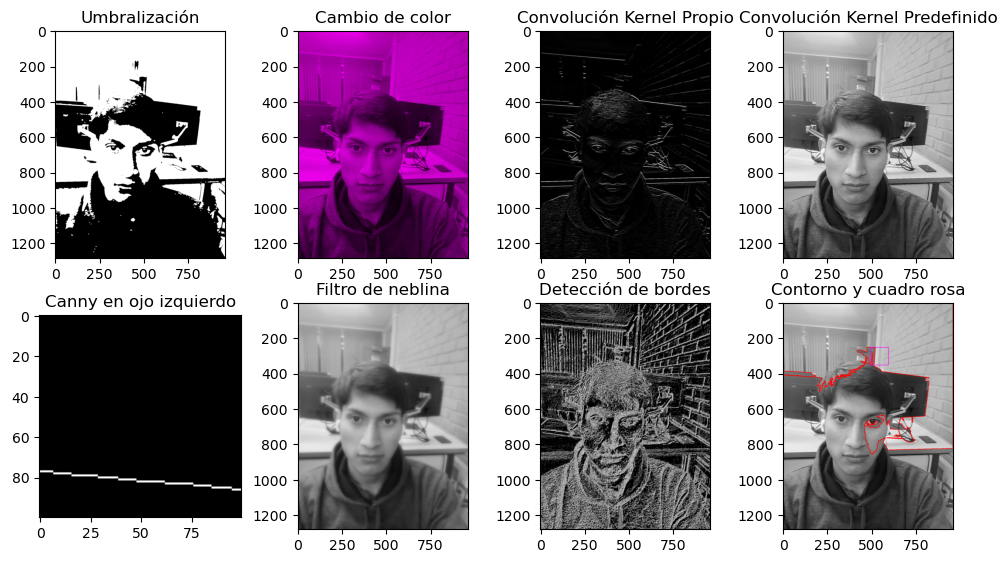

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('santiago.jpeg', cv2.IMREAD_GRAYSCALE)
_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
mascara = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_fin_umb = cv2.dilate(img_bin, mascara)

img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
img_color[:, :, 1] = 0

kernel_propio = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
img_fin_ConvPropio = cv2.filter2D(img, -1, kernel_propio)

kernel_predefinido = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
imgfin_ConvPredefinido = cv2.filter2D(img, -1, kernel_predefinido)

eye_region = img[50:150, 50:150]
eye_canny = cv2.Canny(eye_region, 20, 80)

imagen_original = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
imagen_empañada = cv2.GaussianBlur(imagen_original, (41, 41), 0)
img_fin_nieblina = (imagen_original * 0.3 + imagen_empañada * 0.7).astype(np.uint8)

sobel_x = cv2.filter2D(img, -1, np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]))
sobel_y = cv2.filter2D(img, -1, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

contornos, _ = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contorno_principal = max(contornos, key=cv2.contourArea)
area = cv2.contourArea(contorno_principal)
perimetro = cv2.arcLength(contorno_principal, True)
M = cv2.moments(contorno_principal)
centroide_x = int(M['m10'] / M['m00'])
centroide_y = int(M['m01'] / M['m00'])

img_contorno = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contorno, [contorno_principal], -1, (255, 0, 0), 2)
cv2.rectangle(img_contorno, (centroide_x - 50, centroide_y - 50), (centroide_x + 50, centroide_y + 50), (255, 0, 255), 2)

plt.figure(figsize=(12, 10))

plt.subplot(3, 4, 1)
plt.title("Umbralización")
plt.imshow(img_fin_umb, cmap='gray')

plt.subplot(3, 4, 2)
plt.title("Cambio de color")
plt.imshow(img_color)

plt.subplot(3, 4, 3)
plt.title("Convolución Kernel Propio")
plt.imshow(img_fin_ConvPropio, cmap='gray')

plt.subplot(3, 4, 4)
plt.title("Convolución Kernel Predefinido")
plt.imshow(imgfin_ConvPredefinido, cmap='gray')

plt.subplot(3, 4, 5)
plt.title("Canny en ojo izquierdo")
plt.imshow(eye_canny, cmap='gray')

plt.subplot(3, 4, 6)
plt.title("Filtro de neblina")
plt.imshow(img_fin_nieblina)

plt.subplot(3, 4, 7)
plt.title("Detección de bordes")
plt.imshow(sobel_combined, cmap='gray')

plt.subplot(3, 4, 8)
plt.title("Contorno y cuadro rosa")
plt.imshow(img_contorno)

plt.show()
